In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd


from time import sleep

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 
from selenium.webdriver.common.by import By


import seaborn as sns
import plotly.express as px  # type: ignore
import plotly.graph_objects as go # type: ignore
from plotly.subplots import make_subplots # type: ignore
import warnings
warnings.filterwarnings('ignore')



In [ ]:
driver = webdriver.Chrome()
url_parafina = "https://parafina.eco/tienda/gafas-de-sol-ecologicas/"
driver.get(url_parafina)
driver.maximize_window()
sleep(1)

for i in range(4):
    driver.execute_script("window.scrollTo(0, 10000);")
    sleep(3)

html_table_page = driver.page_source

driver.quit()



# A partir de aqui ya lo hacemos con BeautifulSoup

sopa = BeautifulSoup(html_table_page, "html.parser")
elementos_gafas = sopa.find("ul", {"class":"products columns-3"})
#print(elementos_gafas)

# Encuentra todos los productos en la lista
productos = elementos_gafas.find_all('li', class_='product')
print(len(productos))

dic_parafina = {
    "nombre":[],
    "precio":[],
    "colores":[],
    "material":[],
}

# Iterar sobre cada producto y extraer la información
for producto in productos:

    nombre_producto = producto.find('h4').get_text(strip=True) if producto.find('h4') else "Nombre no disponible"

    # Extraer el precio del producto
    precio = producto.find('span', class_='price').get_text(strip=True) if producto.find('span', class_='price') else "Precio no disponible"
    precio_final = precio.split()[-1]

    # Extraer los colores disponibles
    colores = [li['data-tooltip'] for li in producto.select('.frame_color_list .frame_color_variation')]

    # Categoria del producto
    categoria = producto.find("small", {"class":"product_category"}).text.strip()

    dic_parafina["nombre"].append(nombre_producto)
    dic_parafina["precio"].append(precio_final)
    dic_parafina["colores"].append(colores)
    dic_parafina["material"].append(categoria)

    # Imprimir resultados para este producto
    print("Nombre del producto:", nombre_producto)
    print("Precio:", precio_final)
    print("Colores disponibles:", colores)
    print("Material producto: ", categoria)
    print("---")  # Separador entre productos

24
Nombre del producto: Isla
Precio: 31,85€.
Colores disponibles: ['Atardecer', 'Lluvia', 'Carey Genjibre', 'Musgo Mate', 'Negro Mate', 'Rosa Palo', 'Carey']
Material producto:  PET (Plástico) Reciclado
---
Nombre del producto: Cala
Precio: 38,35€.
Colores disponibles: ['Transparente', 'Atardecer', 'Caramelo', 'Negro', 'Carey Suave']
Material producto:  Bambú Orgánico
---
Nombre del producto: Arroyo
Precio: 31,85€.
Colores disponibles: ['Lluvia', 'Carey Genjibre', 'Transparente', 'Negro Mate', 'Rosa Palo', 'Carey']
Material producto:  PET (Plástico) Reciclado
---
Nombre del producto: Costa
Precio: 38,35€.
Colores disponibles: ['Transparente', 'Zanahoria', 'Caramelo', 'Negro', 'Carey Suave']
Material producto:  Bambú Orgánico
---
Nombre del producto: Cauce
Precio: 31,85€.
Colores disponibles: ['Atardecer', 'Lluvia', 'Carey Genjibre', 'Transparente', 'Negro Mate', 'Rosa Palo']
Material producto:  PET (Plástico) Reciclado
---
Nombre del producto: Ruta
Precio: 38,35€.
Colores disponibles: 

In [37]:
df_parafina = pd.DataFrame(dic_parafina)
df_parafina_final = df_parafina.explode('colores', ignore_index=True)
df_parafina_final["precio"] = df_parafina_final["precio"].str.replace("€.", "")
df_parafina_final["precio"] = df_parafina_final["precio"].str.replace(",", ".").astype(float)

df_parafina_final.to_csv("../datos/df_parafina_final.csv")

In [62]:
df_parafina_final

,nombre,precio,colores,material
0,Isla,31.85,Atardecer,PET (Plástico) Reciclado
1,Isla,31.85,Lluvia,PET (Plástico) Reciclado
2,Isla,31.85,Carey Genjibre,PET (Plástico) Reciclado
3,Isla,31.85,Musgo Mate,PET (Plástico) Reciclado
4,Isla,31.85,Negro Mate,PET (Plástico) Reciclado
...,...,...,...,...
90,Vía,38.35,Negro,Goma Reciclada
91,Vía,38.35,Verde Oscuro,Goma Reciclada
92,Viento,51.35,Negro,Metal Reciclado
93,Viento,51.35,Carey,Metal Reciclado


In [71]:
df_parafina_final.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,95.0,38.623684,6.046152,31.85,31.85,38.35,44.85,51.35


- Buscamos el precio por modelo

In [ ]:
df_precio_medio = df_parafina_final.groupby("nombre")["precio"].mean().reset_index()
df_precio_medio = df_precio_medio.sort_values(by="precio", ascending=False)


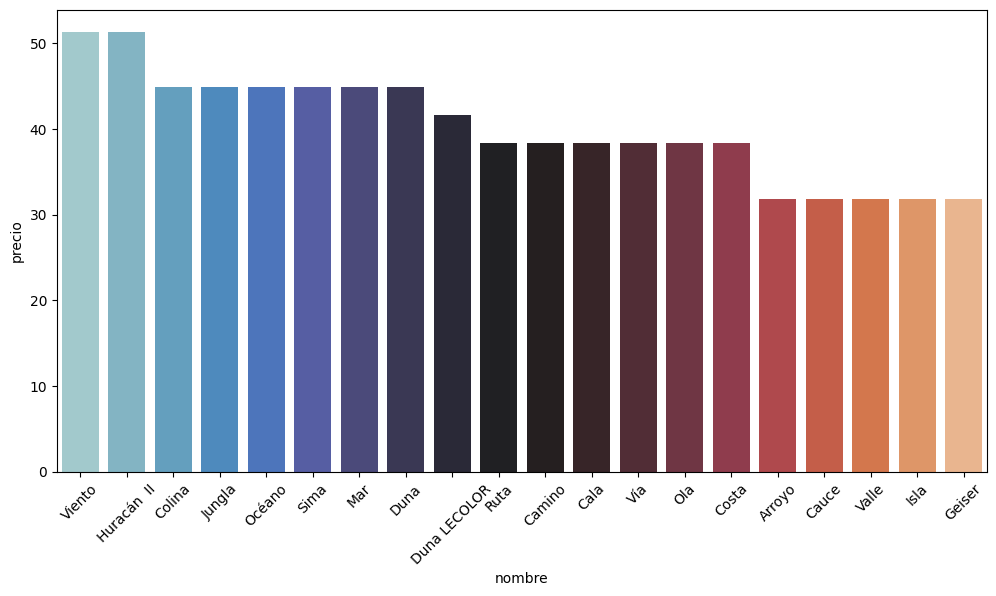

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico (ancho, alto)
sns.barplot(df_precio_medio, x="nombre", y="precio", palette="icefire")

plt.xticks(rotation=45)  # Rota las etiquetas del eje x en 45 grados (puedes ajustar el ángulo)
plt.show()

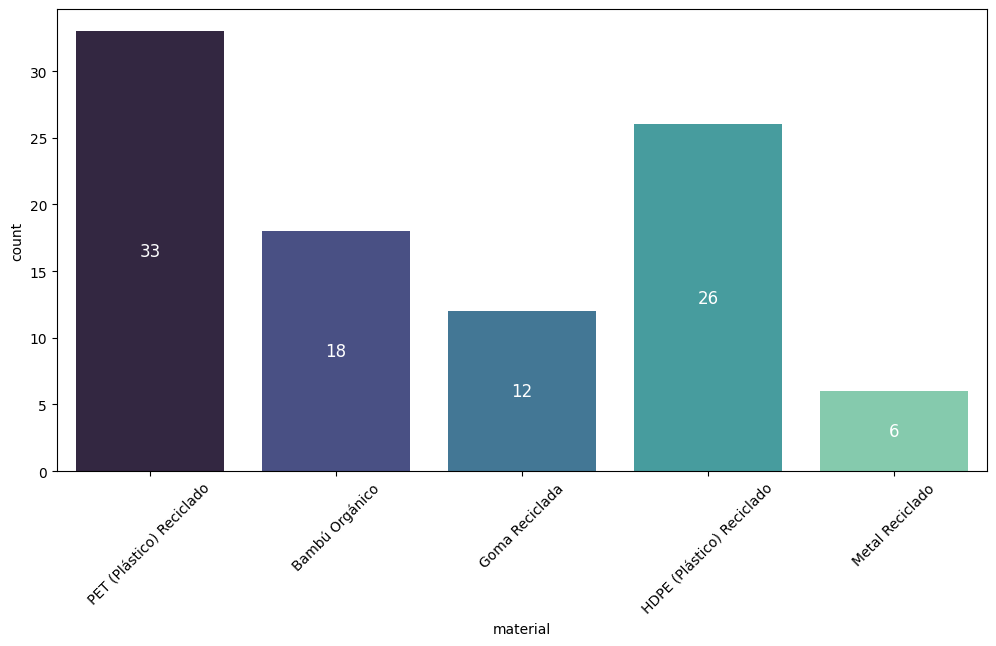

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico (ancho, alto)
ax = sns.countplot(df_parafina_final, x="material", palette="mako")

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Agregar el total dentro de cada barra
for p in ax.patches:
    # Obtener las coordenadas y el alto de cada barra
    height = p.get_height()
    # Colocar el total dentro de la barra, en el centro
    ax.text(p.get_x() + p.get_width() / 2, height / 2,  # Centrado verticalmente dentro de la barra
            f'{int(height)}', ha='center', va='center', fontsize=12, color='white')

# Mostrar el gráfico
plt.show()
